In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
x = np.load('/content/drive/MyDrive/data/Region/X_2dip.npy')
y = np.load('/content/drive/MyDrive/data/Region/Y_2dip.npy')

In [ ]:
x_test = np.load('/content/drive/MyDrive/data/Region/X_2dip_test.npy')
y_test = np.load('/content/drive/MyDrive/data/Region/Y_2dip_test.npy')

In [ ]:
x[0].shape

(10, 306)

In [ ]:
x_test[1]

array([[ 1.62562666e-19, -4.27099293e-19, -3.54439957e-20, ...,
        -1.17312736e-18,  4.78010835e-19, -3.42677482e-20],
       [-2.44235977e-19, -6.03643146e-19, -4.24058177e-20, ...,
         8.17679355e-20,  4.87626535e-19, -7.12229590e-20],
       [ 4.54385194e-20, -1.75786688e-18, -1.51282185e-19, ...,
        -5.10600130e-18,  5.09452355e-19, -9.81624814e-20],
       ...,
       [-8.16305477e-19, -9.29516186e-21, -6.42689762e-20, ...,
         1.84231272e-19, -4.40249054e-18,  2.24398751e-19],
       [ 2.20387380e-18, -1.64647880e-18, -2.02664175e-19, ...,
        -5.64413563e-18, -1.22819466e-17,  6.18176917e-19],
       [ 2.67417644e-18, -4.14178967e-18, -3.49143274e-19, ...,
        -8.34722433e-18, -1.17076394e-17,  3.64994996e-19]])

In [ ]:
d = np.genfromtxt('/content/drive/MyDrive/data/Vert.csv', delimiter = ',')
d = d[1:]

In [ ]:
d

array([[-0.080401 ,  0.015848 ,  0.052857 ],
       [-0.080093 ,  0.0068873,  0.05685  ],
       [-0.080343 ,  0.012273 ,  0.053598 ],
       ...,
       [ 0.099568 , -0.006685 ,  0.045418 ],
       [ 0.10013  , -0.008073 ,  0.040438 ],
       [ 0.10041  , -0.010011 ,  0.048022 ]])

In [ ]:
for i in range(x.shape[0]):
    scaler = StandardScaler().fit(x[i])
    x[i] = scaler.transform(x[i])

for i in range(x_test.shape[0]):
    scaler = StandardScaler().fit(x_test[i])
    x_test[i] = scaler.transform(x_test[i])

In [ ]:
print(x.shape)
print(y.shape)

(3150, 10, 306)
(3150, 10, 45)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(250, 10, 306)
(250, 10, 45)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import SimpleRNN
from keras.losses import CategoricalCrossentropy
from keras.losses import BinaryCrossentropy
from keras.metrics import CategoricalAccuracy
from keras.metrics import BinaryAccuracy
from matplotlib import pyplot as plt

In [ ]:
model = Sequential()
model.add(SimpleRNN(y.shape[2], return_sequences=True, activation="sigmoid"))
model.compile(optimizer='Adam', loss='binary_crossentropy')

In [ ]:
history = model.fit(x, y, epochs = 100)

Epoch 1/100
99/99 [==============================] - 6s 8ms/step - loss: 0.5196
Epoch 2/100
99/99 [==============================] - 1s 8ms/step - loss: 0.4058
Epoch 3/100
99/99 [==============================] - 1s 8ms/step - loss: 0.3756
Epoch 4/100
99/99 [==============================] - 1s 8ms/step - loss: 0.3568
Epoch 5/100
99/99 [==============================] - 1s 11ms/step - loss: 0.3425
Epoch 6/100
99/99 [==============================] - 2s 16ms/step - loss: 0.3299
Epoch 7/100
99/99 [==============================] - 1s 13ms/step - loss: 0.3188
Epoch 8/100
99/99 [==============================] - 1s 12ms/step - loss: 0.3084
Epoch 9/100
99/99 [==============================] - 1s 10ms/step - loss: 0.2988
Epoch 10/100
99/99 [==============================] - 1s 10ms/step - loss: 0.2893
Epoch 11/100
99/99 [==============================] - 1s 11ms/step - loss: 0.2799
Epoch 12/100
99/99 [==============================] - 1s 10ms/step - loss: 0.2707
Epoch 13/100
99/99 [=========

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 10, 45)            15840     
                                                                 
Total params: 15,840
Trainable params: 15,840
Non-trainable params: 0
_________________________________________________________________


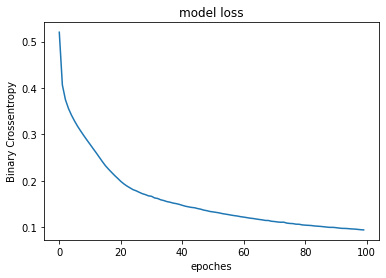

In [ ]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('Binary Crossentropy')
plt.xlabel('epoches')
#plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [ ]:
y_pred= model.predict(x_test)

8/8 [==============================] - 0s 3ms/step


In [ ]:
y_pred[32][9].round().nonzero()

(array([ 7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 37, 44]),)

In [ ]:
y_test[32][9].nonzero()

(array([ 1,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 42,
        44]),)

In [ ]:
y_pred[32][6].round().argmax()

10

In [ ]:
y_test[32][6].argmax()

10

In [ ]:
m = CategoricalAccuracy()
m.update_state(y_test, y_pred)
m.result().numpy()

0.2752

In [ ]:
m = BinaryAccuracy()
m.update_state(y_test, y_pred)
m.result().numpy()

0.9486222

In [ ]:
y_pred[0]

array([[4.36641416e-03, 2.44048284e-03, 2.81397207e-03, 5.75010316e-04,
        4.24978184e-03, 1.21362805e-02, 2.21070722e-02, 2.65401565e-02,
        7.44773773e-04, 8.62989575e-03, 2.99688824e-03, 4.17109625e-03,
        1.88923464e-03, 7.52331913e-02, 3.36682517e-03, 1.23119084e-02,
        3.87033075e-02, 2.53919000e-03, 3.50377001e-02, 1.23273302e-02,
        2.01867521e-02, 1.66492555e-02, 4.96859737e-02, 1.75861642e-02,
        8.60970933e-03, 8.40551406e-03, 1.58458918e-01, 1.59604624e-02,
        1.95426922e-02, 3.67657505e-02, 4.95520011e-02, 9.86515582e-02,
        8.06092471e-02, 8.32838193e-02, 2.68200506e-02, 2.80584325e-03,
        5.96853299e-03, 6.30705792e-04, 8.94996617e-03, 4.15205583e-03,
        7.32543087e-03, 1.95659641e-02, 2.26752907e-02, 5.12996558e-05,
        5.73190115e-02],
       [1.02660675e-02, 3.39974798e-02, 1.66058575e-03, 7.68273463e-03,
        1.08523797e-02, 5.33138923e-02, 8.10819853e-04, 1.75177958e-02,
        1.28513097e-03, 1.04176253e-02,

In [ ]:
import pickle
with open("/content/drive/MyDrive/data/Region/oblast", "rb") as fp:   # Unpickling
  idx = pickle.load(fp)

In [ ]:
err1 = []
err2 = []
K1 = []
K2 = []
for n_dip in range(len(y_test)):
  k1=[]
  k2=[]

  for j in range(10):
    k = y_pred[n_dip][j].argmax()
    k1.append(k)

  for j in range(10):
    k = y_test[n_dip][j].argmax()
    k2.append(k)
  
  K1.append(k1)
  K2.append(k2)

  
  for i in range(10):
    tr = d[idx[k2[i]]]
    pr = d[idx[k1[i]]]
    err1.append((((tr[0]-pr[0])*1000)**2+((tr[1]-pr[1])*1000)**2+((tr[2]-pr[2])*1000)**2)**(1/2))

  for i in range(9):
    d1 = d[idx[k1[i]]]
    d2 = d[idx[k1[i+1]]]
    err2.append((((d2[0]-d1[0])*1000)**2+((d2[1]-d1[1])*1000)**2+((d2[2]-d1[2])*1000)**2)**(1/2))

err1 = np.array( err1 )
err2 = np.array( err2 )

print(np.mean(err1))
print(np.mean(err2))

0.010956015972383356
2.4083054539114026


In [ ]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test[0][0], y_pred[0][0].round(), labels = [0, 1]).ravel() 

In [ ]:
print(y_test[1][0])
print(y_pred[1][0].round())

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
y_pred[125][0].argmax()

11

In [ ]:
precision = tp/(tp+fp)
precision

<ipython-input-91-60b7befcf007>:1: RuntimeWarning: invalid value encountered in long_scalars
  precision = tp/(tp+fp)


nan

In [ ]:
recall = tp/(tp+fn)
recall

0.0

In [ ]:
f1 = tp/(tp+(fp+fn)/2)
f1

0.0

In [ ]:
#микроусреднение
tn, fp, fn, tp,k = 0,0,0,0,0
for i in range(y_test.shape[0]):
  for j in range(y_test.shape[1]):
    buf= confusion_matrix(y_test[i][j], y_pred[i][j].round(), labels = [0, 1]).ravel() 
    tn+=buf[0]
    fp+=buf[1]
    fn+=buf[2]
    tp+=buf[3]
    k+=1

tp = tp/k
fn = fn/k
fp = fp/k

recall = tp/(tp+fn)
precision = tp/(tp+fp)
f1 = tp/(tp+(fp+fn)/2)

print(f'tn = {tn}, fp = {fp}, fn = {fn}, tp = {tp}')
print(f'Recall = {recall}')
print(f'Precision = {precision}')
print(f'F1 = {f1}')

tn = 87323, fp = 0.7512, fn = 0.8984, tp = 8.4212
Recall = 0.9036010129190094
Precision = 0.9181021324844096
F1 = 0.9107938568029419


In [ ]:
#макроусреднение
recall_macro = []
precision_macro = []
for i in range(y_test.shape[0]):
  for j in range(y_test.shape[1]):
    tn, fp, fn, tp = confusion_matrix(y_test[i][j], y_pred[i][j].round(), labels = [0, 1]).ravel() 
    recall = tp/(tp+fn)
    #precision = tp/(tp+fp)
    recall_macro.append(recall)
    #precision_macro.append(precision)

print(f'Recall = {np.mean(np.array(recall_macro))}')
#print(f'Precision = {np.mean(np.array(precision_macro))}')

Recall = 0.8002379106373841


In [ ]:
recall = 0
for i in range(250):
  recall+=recall_score(y_test[i], y_pred[i].round(), average='samples') 
print(f'Recall = {recall/250}')

Recall = 0.8528000000000009


In [ ]:
precision = 0
for i in range(250):
  precision+=precision_score(y_test[i], y_pred[i].round(), average='samples',zero_division='warn') 

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

In [ ]:
print(f'Precision = {precision/250}')

Precision = 0.7701409523809528
